In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


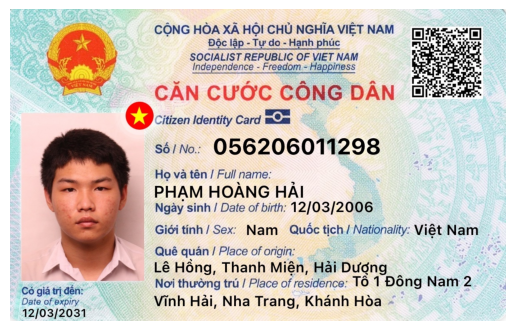

 

   
 

A

Co gia tri dén:
Date of expiry
12/03/2031

CONG HOA XA HO! CHU NGHIA VIET NAM ta B

Déc lap - Ty do - Hanh phic
SOCIALIST REPUBLIC OF VIET NAM
Independence - Freedom = Happiness

CAN CU'O'C CONG DAN rg

 
  

© Citizen Identity Card m&a

s6/No.. 056206011298

Ho va tén / Full name: J

PHAM HOANG HAI

Ngay sinh / Date of birth: 12/03/2006

Gidi tinh / Sex: Nam Quéc tich/ Nationality: Viét Nam
Qué quan / Place of origin:

Lé Hong, Thanh Mién, Hai Dudng

Noi throng tru / Place of residence: T6 1 D6ng Nam 2

Vinh Hai, Nha Trang, Khanh Hoa



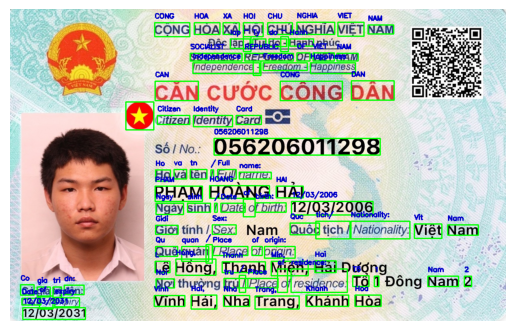

In [5]:
from PIL import Image
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pytesseract import Output
import pandas as pd

# Đọc và hiển thị ảnh gốc
filename = '/content/cccd.jpg'
img = plt.imread(filename)
plt.imshow(img)
plt.axis('off')
plt.show()

# Chuyển ảnh sang định dạng phù hợp cho Tesseract
img1 = np.array(Image.open(filename))

# OCR toàn bộ văn bản (dạng chuỗi)
text_raw = pytesseract.image_to_string(img1)
print(text_raw)

# OCR chi tiết từng từ
results = pytesseract.image_to_data(img1, output_type=Output.DICT)

# Vẽ bounding box quanh từ có độ tin cậy cao
for i in range(len(results["text"])):
    x = results["left"][i]
    y = results["top"][i]
    w = results["width"][i]
    h = results["height"][i]
    text = results["text"][i]
    conf = int(results["conf"][i])

    if conf > 70 and text.strip() != "":
        # Làm sạch ký tự không phải ASCII (tránh lỗi font)
        clean_text = ''.join([c if ord(c) < 128 else '' for c in text]).strip()

        # Vẽ khung chữ nhật
        cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Ghi văn bản lên ảnh
        cv2.putText(img1, clean_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)

# Hiển thị ảnh sau khi vẽ khung và text
plt.imshow(img1)
plt.axis('off')
plt.show()

# Ghi kết quả ra file Excel (lọc văn bản có độ tin cậy cao)
df = pd.DataFrame(results)
filtered_df = df[(df['conf'].astype(int) > 70) & (df['text'].str.strip() != '')]
filtered_df.to_excel('CCCD_file_excel.xlsx', index=False)
